# Twitter analytics

This is a short script to analyse data from Twitter Analytics. You may need to modify the code slightly to work with your data.

## Twitter Tweet activity by day

In [1]:
import pandas as pd
import glob
from plotnine import *

# Define the directory where the CSV files are located
# directory = '/path/to/csv/directory/'
directory = 'Twitter_data/'

# Define the file pattern to match (e.g., '*.csv' to match all CSV files)
file_pattern = 'daily_tweet_activity_metrics*.csv'

# Get the list of file paths matching the pattern in the directory
file_paths = glob.glob(directory + file_pattern)

# Initialize an empty list to store the DataFrames
frames = []

# Loop over the file paths and read each CSV file into a DataFrame
for path in file_paths:
    df = pd.read_csv(path)
    frames.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(frames, ignore_index=True)

# Print info for the resulting DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          166 non-null    object 
 1   Tweets published              166 non-null    int64  
 2   impressions                   166 non-null    int64  
 3   engagements                   166 non-null    int64  
 4   engagement rate               166 non-null    float64
 5   retweets                      166 non-null    int64  
 6   replies                       166 non-null    int64  
 7   likes                         166 non-null    int64  
 8   user profile clicks           166 non-null    int64  
 9   url clicks                    166 non-null    int64  
 10  hashtag clicks                166 non-null    int64  
 11  detail expands                166 non-null    int64  
 12  permalink clicks              166 non-null    int64  
 13  app o

In [2]:
# Convert the 'date_column' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select all columns that don't start with "promoted"
df = df.filter(regex='^(?!promoted)')

# Subset the data
df = df.iloc[:, 0:9]

# Print info for the resulting DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 166 non-null    datetime64[ns]
 1   Tweets published     166 non-null    int64         
 2   impressions          166 non-null    int64         
 3   engagements          166 non-null    int64         
 4   engagement rate      166 non-null    float64       
 5   retweets             166 non-null    int64         
 6   replies              166 non-null    int64         
 7   likes                166 non-null    int64         
 8   user profile clicks  166 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 11.8 KB


In [3]:
# Melt the DataFrame into long format
df_long = df.melt(id_vars=['Date'], value_vars=df.columns, var_name='measure', value_name='value')

# Print the first few rows to check this worked
df_long.head()

,Date,measure,value
0,2023-06-01,Tweets published,0.0
1,2023-06-02,Tweets published,0.0
2,2023-06-03,Tweets published,0.0
3,2023-06-04,Tweets published,0.0
4,2023-06-05,Tweets published,0.0


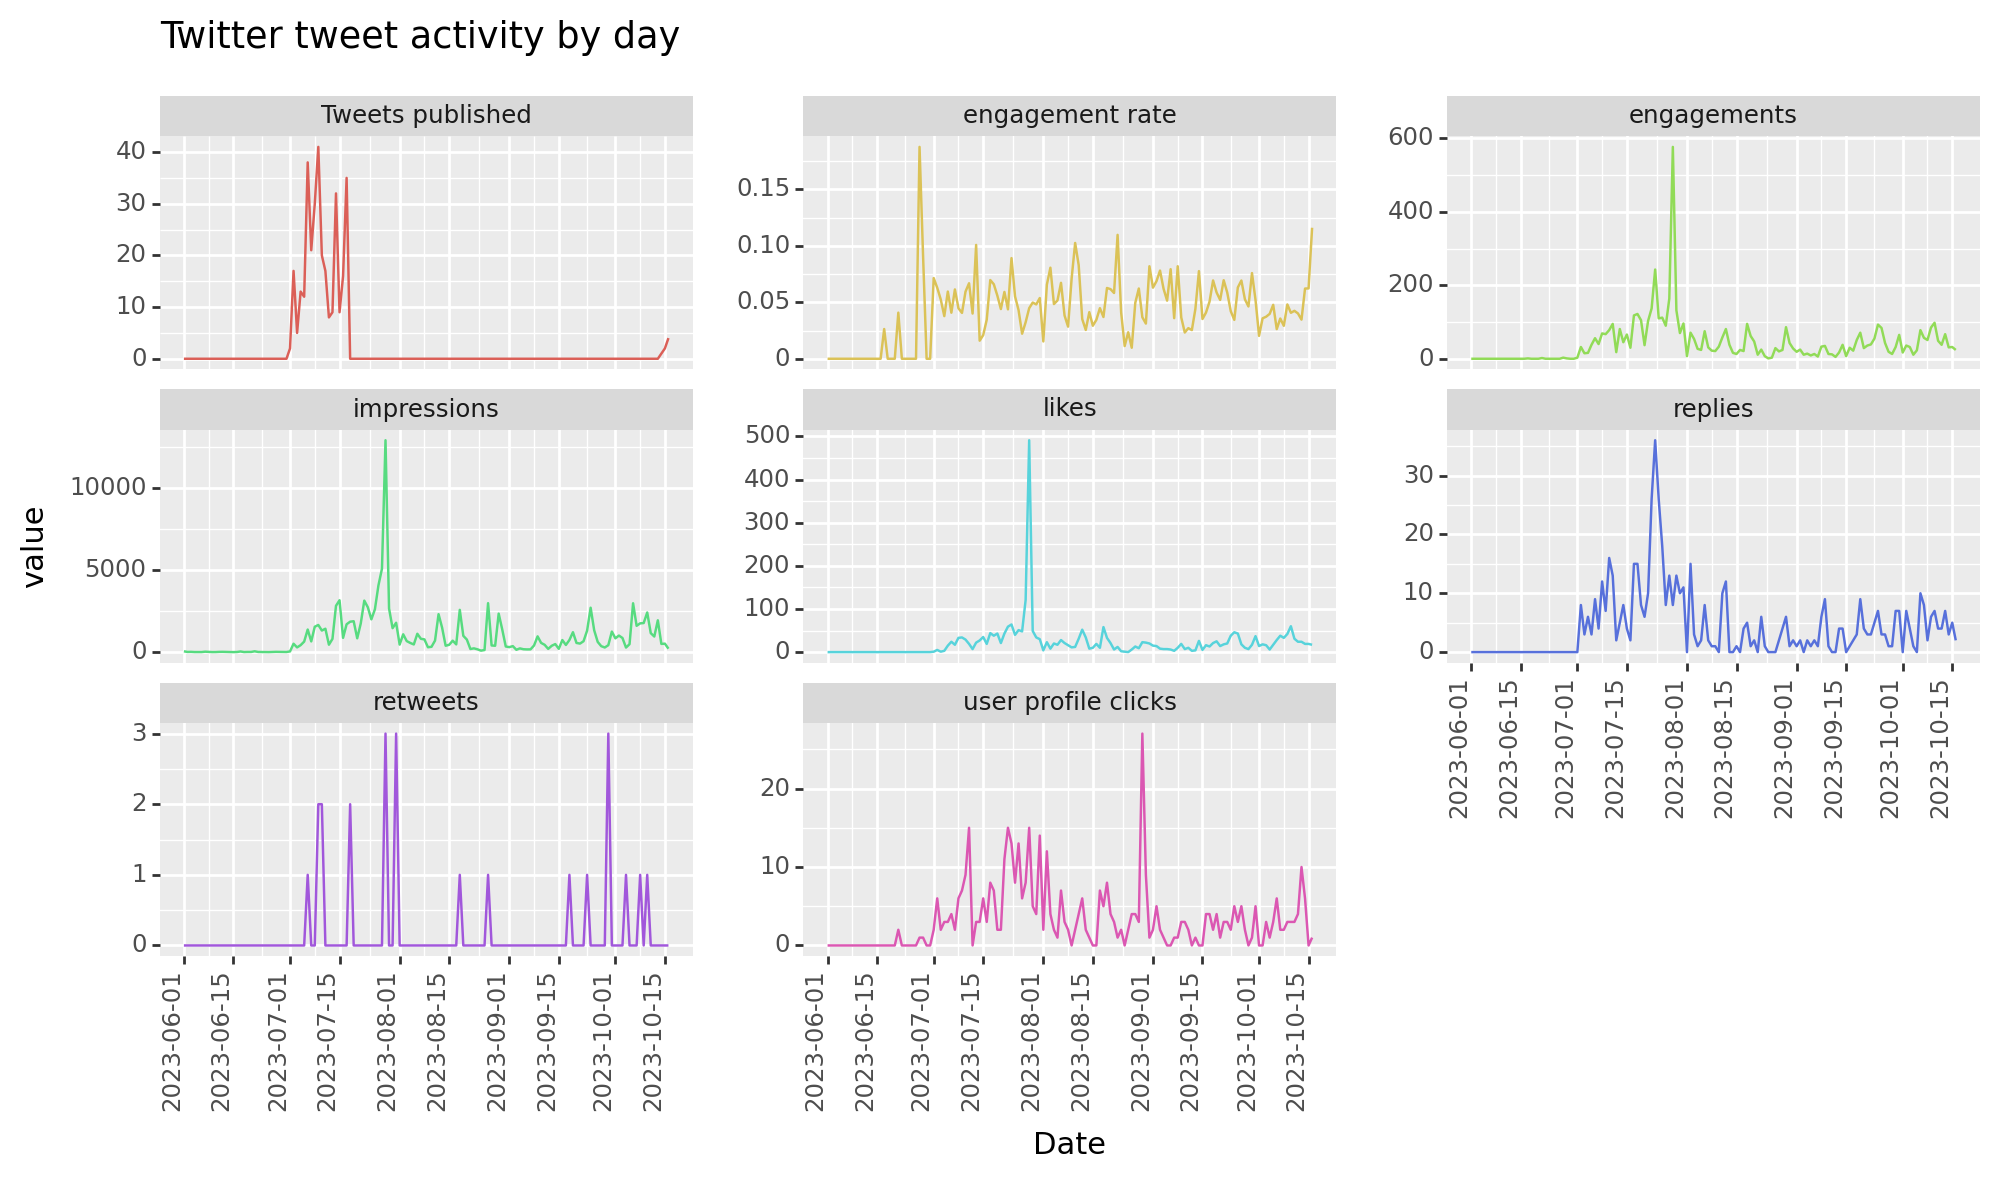

<Figure Size: (1000 x 600)>

In [4]:
# Create a ggplot object and specify the data, aesthetics, and geoms
(ggplot(df_long, aes(x='Date', y='value', color='measure')) +
 geom_line() +
 facet_wrap('~ measure', scales='free_y') +
 theme(figure_size=(10, 6), legend_position='none', axis_text_x=element_text(angle=90, hjust=1)) +
 ggtitle('Twitter tweet activity by day'))

## Twitter Tweet activity by tweet

In [5]:
# Define the file pattern to match (e.g., '*.csv' to match all CSV files)
file_pattern = 'tweet_activity_metrics*.csv'

# Get the list of file paths matching the pattern in the directory
file_paths = glob.glob(directory + file_pattern)

# Initialize an empty list to store the DataFrames
frames = []

# Loop over the file paths and read each CSV file into a DataFrame
for path in file_paths:
    df = pd.read_csv(path)
    frames.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(frames, ignore_index=True)

# Print info for the resulting DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tweet id                      1803 non-null   object 
 1   Tweet permalink               1803 non-null   object 
 2   Tweet text                    1803 non-null   object 
 3   time                          1803 non-null   object 
 4   impressions                   1803 non-null   float64
 5   engagements                   1803 non-null   float64
 6   engagement rate               1803 non-null   float64
 7   retweets                      1803 non-null   float64
 8   replies                       1803 non-null   float64
 9   likes                         1803 non-null   float64
 10  user profile clicks           1803 non-null   float64
 11  url clicks                    1803 non-null   float64
 12  hashtag clicks                1803 non-null   float64
 13  det

In [6]:
df.head()

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1686120781816672256,https://twitter.com/PropertyOfMyCat/status/168...,@hanna_unterwegs Thanks! 😊,2023-07-31 21:04 +0000,15.0,1.0,0.066667,0.0,0.0,1.0,...,-,-,-,-,-,-,-,-,-,-
1,1686120513779769344,https://twitter.com/PropertyOfMyCat/status/168...,@maleficblack I'd prefer a mutual take it so t...,2023-07-31 21:03 +0000,31.0,12.0,0.387097,0.0,1.0,2.0,...,-,-,-,-,-,-,-,-,-,-
2,1686118579693928449,https://twitter.com/PropertyOfMyCat/status/168...,@James___UK I've seen tweets from other people...,2023-07-31 20:56 +0000,4.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
3,1686113344904704000,https://twitter.com/PropertyOfMyCat/status/168...,"Wow, a couple of years ago if I posted a selfi...",2023-07-31 20:35 +0000,41.0,6.0,0.146341,0.0,1.0,3.0,...,-,-,-,-,-,-,-,-,-,-
4,1686110397621833728,https://twitter.com/PropertyOfMyCat/status/168...,@StopTweetingMia Good morning Mia!,2023-07-31 20:23 +0000,9.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-


**Remove following cell if you want to include your replies to other people's tweets.**

In [7]:
# Remove rows where 'Tweet text' starts with '@'
mask = df['Tweet text'].str.startswith('@')
df = df[~mask]
df.head()

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
3,1686113344904704000,https://twitter.com/PropertyOfMyCat/status/168...,"Wow, a couple of years ago if I posted a selfi...",2023-07-31 20:35 +0000,41.0,6.0,0.146341,0.0,1.0,3.0,...,-,-,-,-,-,-,-,-,-,-
5,1686107156100108288,https://twitter.com/PropertyOfMyCat/status/168...,"Please RT, preferably QRT, to increase the lik...",2023-07-31 20:10 +0000,60.0,4.0,0.066667,0.0,1.0,1.0,...,-,-,-,-,-,-,-,-,-,-
6,1686091609912250368,https://twitter.com/PropertyOfMyCat/status/168...,I *still* have an invite to give away for the ...,2023-07-31 19:09 +0000,484.0,21.0,0.043388,2.0,0.0,3.0,...,-,-,-,-,-,-,-,-,-,-
7,1686070888423178265,https://twitter.com/PropertyOfMyCat/status/168...,Chasers awake? I don't often post selfies here...,2023-07-31 17:46 +0000,127.0,27.0,0.212598,0.0,3.0,8.0,...,-,-,-,-,-,-,-,-,-,-
8,1686065067278680066,https://twitter.com/PropertyOfMyCat/status/168...,I will be posting on my own timeline much less...,2023-07-31 17:23 +0000,55.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-


In [8]:
# Convert the 'date_column' to datetime format
df['time'] = pd.to_datetime(df['time'])

# Select all columns that don't start with "promoted"
df = df.filter(regex='^(?!promoted)')

# Select all columns that don't start with "Tweet"
df = df.filter(regex='^(?!Tweet)')

# Subset the data
df = df.iloc[:, 0:8]

# Print info for the resulting DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 3 to 1802
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   time                 308 non-null    datetime64[ns, UTC]
 1   impressions          308 non-null    float64            
 2   engagements          308 non-null    float64            
 3   engagement rate      308 non-null    float64            
 4   retweets             308 non-null    float64            
 5   replies              308 non-null    float64            
 6   likes                308 non-null    float64            
 7   user profile clicks  308 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 21.7 KB


In [9]:
# Melt the DataFrame into long format
df_long = df.melt(id_vars=['time'], value_vars=df.columns, var_name='measure', value_name='value')

# Print the first few rows to check this worked
df_long.head()

,time,measure,value
0,2023-07-31 20:35:00+00:00,impressions,41.0
1,2023-07-31 20:10:00+00:00,impressions,60.0
2,2023-07-31 19:09:00+00:00,impressions,484.0
3,2023-07-31 17:46:00+00:00,impressions,127.0
4,2023-07-31 17:23:00+00:00,impressions,55.0


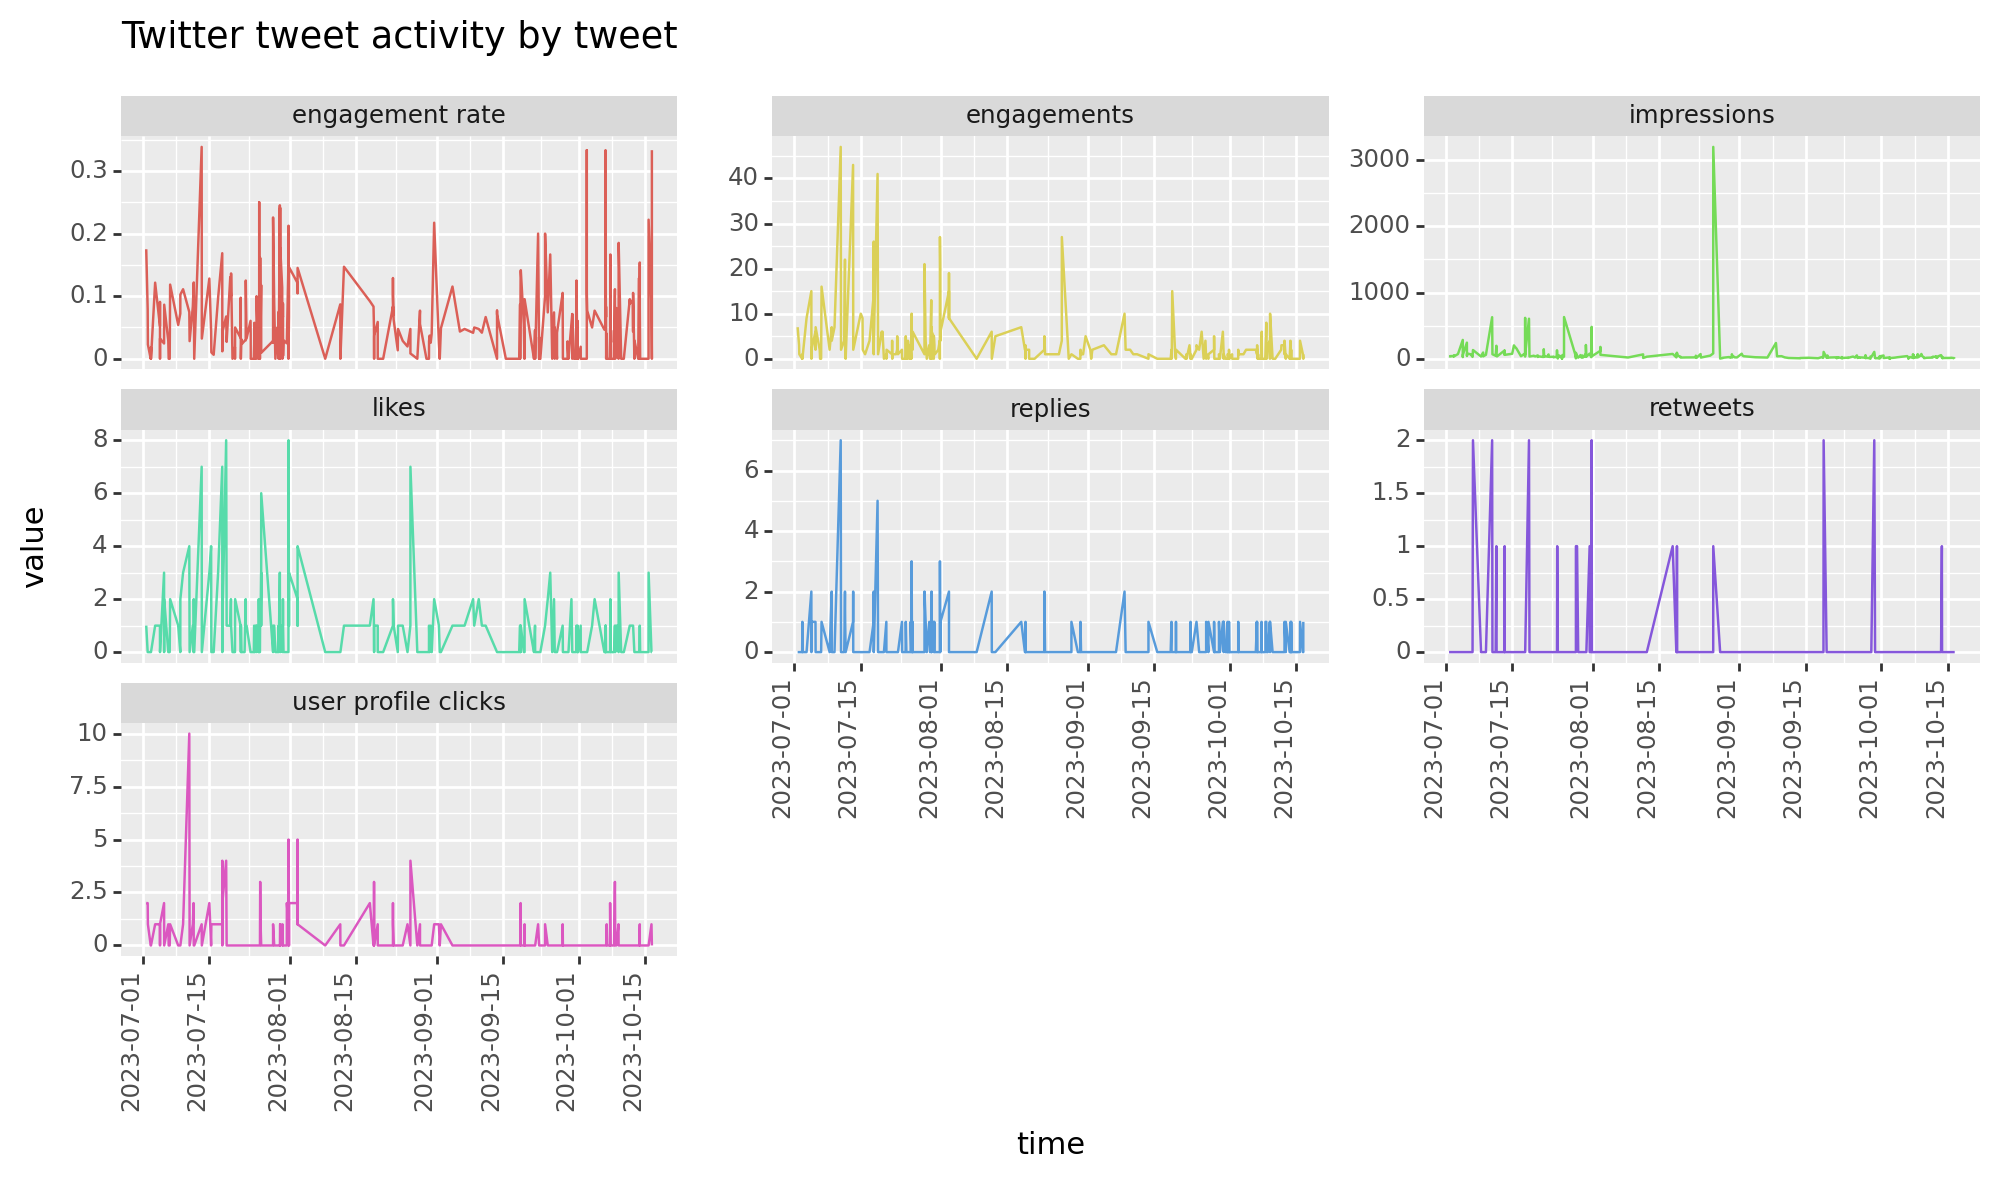

<Figure Size: (1000 x 600)>

In [10]:
# Create a ggplot object and specify the data, aesthetics, and geoms
(ggplot(df_long, aes(x='time', y='value', color='measure')) +
 geom_line() +
 facet_wrap('~ measure', scales='free_y') +
 theme(figure_size=(10, 6), legend_position='none', axis_text_x=element_text(angle=90, hjust=1)) +
 ggtitle('Twitter tweet activity by tweet'))